## 1. Data Preparation 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import csv
import os
import requests
import time
import sys
from scipy.stats import linregress
import statsmodels.api as sm
import seaborn as sns
import seaborn; seaborn.set()

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
# Loading our CSV file containing data for 2014-2019
file_1 = "Source data/Monthly_Counts_of_Deaths_by_Select_Causes__2014-2019.csv"

# Read the data back into the dataframe from the csv file
df1 = pd.read_csv(file_1)

df1.head()

,Jurisdiction of Occurrence,Year,Month,All Cause,Natural Cause,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Influenza and Pneumonia,...,Other Diseases of Respiratory System,"Nephritis, Nephrotic Syndrome, and Nephrosis","Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified",Diseases of Heart,Cerebrovascular Diseases,Accidents (Unintentional Injuries),Motor Vehicle Accidents,Intentional Self-Harm (Suicide),Assault (Homicide),Drug Overdose
0,United States,2014,1,243298,226621,3944,51101,7344,8305,7929,...,3466,4600,2815,58229,12074,11461,2572,3320,1213,4026
1,United States,2015,1,265355,247269,4194,52346,8053,11638,10005,...,3797,4979,3005,63190,13576,12311,2754,3618,1437,4354
2,United States,2016,1,245823,227341,3846,51863,7392,10612,5295,...,3705,4645,2755,58049,12968,12559,2734,3720,1499,4631
3,United States,2017,1,262832,241918,4089,52120,7907,12018,6925,...,4083,4818,2769,61650,13595,14520,3034,3709,1726,6233
4,United States,2018,1,286744,265418,4502,52876,8674,13410,12164,...,4603,5346,3138,67024,14653,14748,3010,3966,1674,5659


In [3]:
# Loading our CSV file containing data for 2020-2023
file_2 = "Source data/Monthly_Provisional_Counts_of_Deaths_by_Select_Causes__2020-2023.csv"

# Read the data back into the dataframe from the csv file
data_2 = pd.read_csv(file_2)
#data_2.head()

# Standardizing the two non-matching attribute names across both source data files
#data_2["Nephritis, Nephrotic Syndrome and Nephrosis"] = data_2["Nephritis, Nephrotic Syndrome, and Nephrosis"]
df2 = data_2.rename(columns = {"Nephritis, Nephrotic Syndrome and Nephrosis":"Nephritis, Nephrotic Syndrome, and Nephrosis", "Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified": "Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified"}) 

df2.head()

,Data As Of,Start Date,End Date,Jurisdiction of Occurrence,Year,Month,All Cause,Natural Cause,Septicemia,Malignant Neoplasms,...,Intentional Self-Harm (Suicide),Assault (Homicide),Drug Overdose,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),flag_accid,flag_mva,flag_suic,flag_homic,flag_drugod
0,08/23/2023,01/01/2020,01/31/2020,United States,2020,1,264681,242914,3687,52635,...,4040.0,1708.0,6547.0,6,4,NaN,NaN,NaN,NaN,NaN
1,08/23/2023,02/01/2020,02/29/2020,United States,2020,2,244966,224343,3324,48764,...,3672.0,1471.0,6435.0,25,20,NaN,NaN,NaN,NaN,NaN
2,08/23/2023,03/01/2020,03/31/2020,United States,2020,3,269806,247634,3669,51640,...,3952.0,1693.0,7268.0,7175,6785,NaN,NaN,NaN,NaN,NaN
3,08/23/2023,04/01/2020,04/30/2020,United States,2020,4,322424,300780,3366,48773,...,3480.0,1756.0,7938.0,65553,62014,NaN,NaN,NaN,NaN,NaN
4,08/23/2023,05/01/2020,05/31/2020,United States,2020,5,280564,255489,3085,49012,...,3769.0,2067.0,9466.0,38330,35279,NaN,NaN,NaN,NaN,NaN


In [4]:
# Concatenating the two source data files
data = pd.concat([df1, df2], ignore_index=True)
data.head()

,Jurisdiction of Occurrence,Year,Month,All Cause,Natural Cause,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Influenza and Pneumonia,...,Data As Of,Start Date,End Date,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),flag_accid,flag_mva,flag_suic,flag_homic,flag_drugod
0,United States,2014,1,243298,226621,3944,51101,7344,8305,7929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,2015,1,265355,247269,4194,52346,8053,11638,10005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,2016,1,245823,227341,3846,51863,7392,10612,5295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States,2017,1,262832,241918,4089,52120,7907,12018,6925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,2018,1,286744,265418,4502,52876,8674,13410,12164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Renaming column for simplification
data = data.rename(columns={"Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified":"Unclassified"})

# Removing the columns and rows that we don't want included in the analysis

# Dropping unecessary columns
data = data.drop(columns=["Jurisdiction of Occurrence","Start Date","End Date", "Data As Of", "flag_accid", "flag_mva", "flag_suic", "flag_homic", "flag_drugod"])


# Dropping non-chronic illness columns (but keeping Covid)
data = data.drop(columns=["All Cause", "Natural Cause", "Influenza and Pneumonia", "Other Diseases of Respiratory System", "Unclassified", "Drug Overdose","Assault (Homicide)", "Intentional Self-Harm (Suicide)", "Motor Vehicle Accidents", "Accidents (Unintentional Injuries)"])

# Removing months in 2023. Adjust as needed.
#data = data.drop(["2023-Jan", "2023-Feb", "2023-Mar", "2023-Apr", "2023-May", "2023-Jun", "2023-Jul", "2023-Aug"])
recentmonths = range(108,116)
data = data.drop(recentmonths)

data.head()

,Year,Month,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Diseases of Heart,Cerebrovascular Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death)
0,2014,1,3944,51101,7344,8305,15078,4600,58229,12074,NaN,NaN
1,2015,1,4194,52346,8053,11638,16769,4979,63190,13576,NaN,NaN
2,2016,1,3846,51863,7392,10612,14331,4645,58049,12968,NaN,NaN
3,2017,1,4089,52120,7907,12018,16574,4818,61650,13595,NaN,NaN
4,2018,1,4502,52876,8674,13410,18271,5346,67024,14653,NaN,NaN


In [6]:
data.tail(10)

,Year,Month,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Diseases of Heart,Cerebrovascular Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death)
98,2022,3,3562,50968,8586,9532,12216,5070,58768,13931,15621.0,10987.0
99,2022,4,3291,48916,7732,8946,11570,4596,55279,13232,6265.0,3670.0
100,2022,5,3354,50660,7885,9389,12067,4626,56365,13230,7634.0,4818.0
101,2022,6,3290,49225,7705,9040,11410,4497,54450,12698,9539.0,6238.0
102,2022,7,3370,51195,7966,9431,11231,4546,56564,13297,13394.0,8944.0
103,2022,8,3321,51598,7704,9407,11254,4507,55701,13234,14138.0,9352.0
104,2022,9,3360,50314,7623,9139,11085,4512,54006,12963,11125.0,7050.0
105,2022,10,3516,52108,8427,10229,12117,4756,57755,13907,9714.0,6082.0
106,2022,11,3697,51123,8486,10244,12923,4759,59244,13906,10033.0,6382.0
107,2022,12,4173,53402,9650,11540,15271,5326,66776,15054,14380.0,9751.0


## 2. Data Quality Check and Cleaning

In [7]:
# Summary statistics 

data.describe()

,Year,Month,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Diseases of Heart,Cerebrovascular Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death)
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.00000,108.000000,108.000000,108.000000,36.000000,36.000000
mean,2018.000000,6.500000,3371.694444,50016.305556,7400.620370,9805.027778,12741.00000,4321.361111,55044.648148,12490.944444,30417.500000,26571.972222
std,2.594026,3.468146,313.035379,1628.417238,1049.946965,1295.054493,1582.58026,402.925945,4718.390123,1183.879058,26855.688598,24993.106732
min,2014.000000,1.000000,2886.000000,45558.000000,5802.000000,6755.000000,10426.00000,3631.000000,46909.000000,9973.000000,6.000000,4.000000
25%,2016.000000,3.750000,3135.500000,48937.750000,6578.500000,9065.750000,11511.00000,4002.000000,51383.500000,11652.000000,10852.000000,6983.750000
50%,2018.000000,6.500000,3312.500000,50255.000000,7157.500000,9764.500000,12178.50000,4286.000000,54662.500000,12391.000000,18981.500000,16439.000000
75%,2020.000000,9.250000,3559.750000,51192.750000,8062.750000,10506.250000,13894.75000,4568.000000,58006.250000,13249.750000,46359.750000,41093.750000
max,2022.000000,12.000000,4502.000000,53402.000000,11050.000000,13410.000000,18271.00000,5845.000000,71492.000000,16361.000000,105566.000000,96438.000000


In [8]:
#Replace "NaN" with 0
data = data.fillna(0)

data.head()
#data.tail()

,Year,Month,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Diseases of Heart,Cerebrovascular Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death)
0,2014,1,3944,51101,7344,8305,15078,4600,58229,12074,0.0,0.0
1,2015,1,4194,52346,8053,11638,16769,4979,63190,13576,0.0,0.0
2,2016,1,3846,51863,7392,10612,14331,4645,58049,12968,0.0,0.0
3,2017,1,4089,52120,7907,12018,16574,4818,61650,13595,0.0,0.0
4,2018,1,4502,52876,8674,13410,18271,5346,67024,14653,0.0,0.0


In [9]:
# Updated summary statistics and data quality review

data.describe()

,Year,Month,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Diseases of Heart,Cerebrovascular Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death)
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.00000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,2018.000000,6.500000,3371.694444,50016.305556,7400.620370,9805.027778,12741.00000,4321.361111,55044.648148,12490.944444,10139.166667,8857.324074
std,2.594026,3.468146,313.035379,1628.417238,1049.946965,1295.054493,1582.58026,402.925945,4718.390123,1183.879058,21058.078056,19044.613493
min,2014.000000,1.000000,2886.000000,45558.000000,5802.000000,6755.000000,10426.00000,3631.000000,46909.000000,9973.000000,0.000000,0.000000
25%,2016.000000,3.750000,3135.500000,48937.750000,6578.500000,9065.750000,11511.00000,4002.000000,51383.500000,11652.000000,0.000000,0.000000
50%,2018.000000,6.500000,3312.500000,50255.000000,7157.500000,9764.500000,12178.50000,4286.000000,54662.500000,12391.000000,0.000000,0.000000
75%,2020.000000,9.250000,3559.750000,51192.750000,8062.750000,10506.250000,13894.75000,4568.000000,58006.250000,13249.750000,10306.000000,6851.250000
max,2022.000000,12.000000,4502.000000,53402.000000,11050.000000,13410.000000,18271.00000,5845.000000,71492.000000,16361.000000,105566.000000,96438.000000


In [10]:
# Creating total selected causes of death columns

total = data.sum(axis = 1) 
total_without_covid = data.sum(axis = 1) - data["COVID-19 (Multiple Cause of Death)"] - data["COVID-19 (Underlying Cause of Death)"]
print(total)

0      162690.0
1      176761.0
2      165723.0
3      174789.0
4      186775.0
         ...   
103    182246.0
104    173208.0
105    180643.0
106    182830.0
107    207357.0
Length: 108, dtype: float64


In [11]:
# Adding total selected causes of death column to duplicate/alternate dataset

data["Total"] = total
data["Total w/o Covid"] = total_without_covid

data.head()

,Year,Month,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Diseases of Heart,Cerebrovascular Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),Total,Total w/o Covid
0,2014,1,3944,51101,7344,8305,15078,4600,58229,12074,0.0,0.0,162690.0,162690.0
1,2015,1,4194,52346,8053,11638,16769,4979,63190,13576,0.0,0.0,176761.0,176761.0
2,2016,1,3846,51863,7392,10612,14331,4645,58049,12968,0.0,0.0,165723.0,165723.0
3,2017,1,4089,52120,7907,12018,16574,4818,61650,13595,0.0,0.0,174789.0,174789.0
4,2018,1,4502,52876,8674,13410,18271,5346,67024,14653,0.0,0.0,186775.0,186775.0


In [12]:
# Importing file to csv

file = "Source data/data.csv"
data.to_csv(file, index=False)


## 3a. Analysis: With regards to the U.S. population, which top three chronic illnesses should we target based on their impact and trend?

In [13]:
# Create a reference to relevant list of illnesses 
chronic_illnesses = ["Diseases of Heart", "Malignant Neoplasms","Septicemia","Diabetes Mellitus","Alzheimer Disease","Chronic Lower Respiratory Diseases","Nephritis, Nephrotic Syndrome, and Nephrosis","Cerebrovascular Diseases"]

# Aggregating deaths per year
deaths_per_year = data.groupby('Year')[chronic_illnesses].sum()

# Create total column
total_deaths_per_year = deaths_per_year.sum(axis = 1) 
deaths_per_year["Total"] = total_deaths_per_year 

deaths_per_year.head(9)


,Diseases of Heart,Malignant Neoplasms,Septicemia,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Cerebrovascular Diseases,Total
Year,,,,,,,,,
2014,614348,591700,38940,76488,93541,147101,48146,133103,1743367
2015,633842,595930,40773,79535,110561,155041,49959,140323,1805964
2016,635260,598038,40613,80058,116103,154596,50046,142142,1816856
2017,647457,599108,40922,83564,121404,160201,50633,146383,1849672
2018,655381,599274,40718,84946,122019,159486,51386,147810,1861020
2019,659041,599601,38431,87647,121499,156979,51565,150005,1864768
2020,698359,603112,40114,102308,134271,152763,52598,160516,1944041
2021,696773,606030,41341,103419,119442,142450,54432,163115,1927002
2022,704361,608968,42291,101302,120103,147411,57942,165625,1948003


In [14]:
deaths_per_year.describe()

,Diseases of Heart,Malignant Neoplasms,Septicemia,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Cerebrovascular Diseases,Total
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000e+00
mean,660535.777778,600195.666667,40460.333333,88807.444444,117660.333333,152892.000000,51856.333333,149891.333333,1.862299e+06
std,32305.140012,5207.112732,1176.704296,10664.938374,10996.429205,6059.669442,2886.733751,11098.444407,6.870599e+04
min,614348.000000,591700.000000,38431.000000,76488.000000,93541.000000,142450.000000,48146.000000,133103.000000,1.743367e+06
25%,635260.000000,598038.000000,40114.000000,80058.000000,116103.000000,147411.000000,50046.000000,142142.000000,1.816856e+06
50%,655381.000000,599274.000000,40718.000000,84946.000000,120103.000000,154596.000000,51386.000000,147810.000000,1.861020e+06
75%,696773.000000,603112.000000,40922.000000,101302.000000,121499.000000,156979.000000,52598.000000,160516.000000,1.927002e+06
max,704361.000000,608968.000000,42291.000000,103419.000000,134271.000000,160201.000000,57942.000000,165625.000000,1.948003e+06


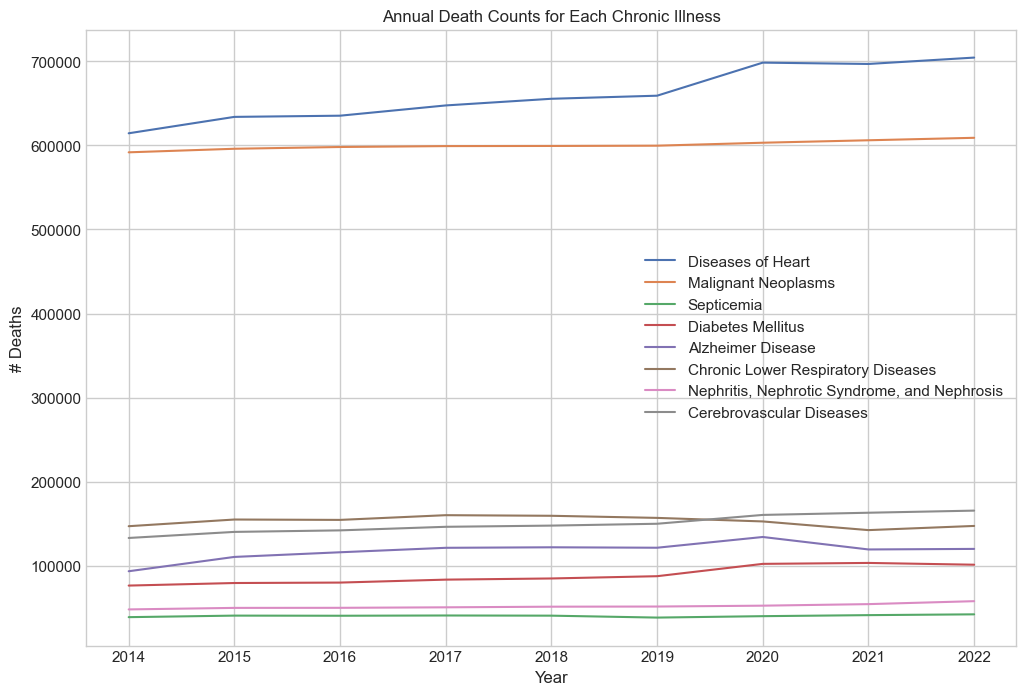

In [15]:
# Plot the annual death counts for selected chronic illnesses (absolute)

deaths_per_year.plot( y = chronic_illnesses, figsize=(12,8))
plt.title("Annual Death Counts for Each Chronic Illness")
plt.ylabel("# Deaths")

plt.show()

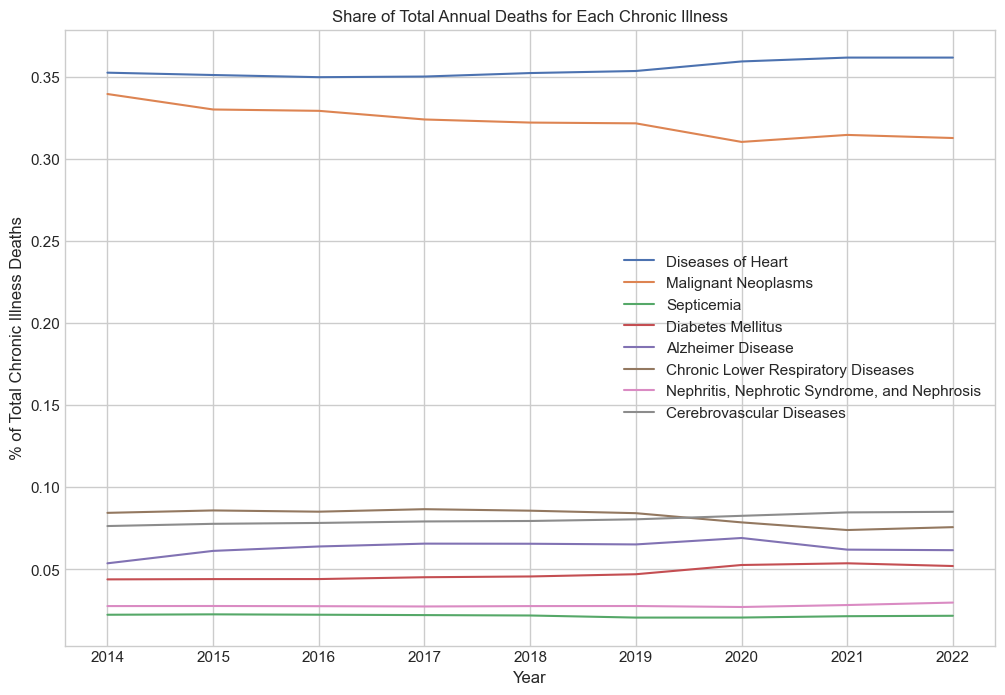

In [16]:
# Plot the annual death counts for selected chronic illnesses (ratio of all selected chronic illnesses)

share_in_deaths = deaths_per_year.divide(deaths_per_year["Total"], axis = 0)
share_in_deaths.plot(y = chronic_illnesses, figsize = (12,8)); 
plt.title("Share of Total Annual Deaths for Each Chronic Illness")
plt.ylabel("% of Total Chronic Illness Deaths")

plt.show()

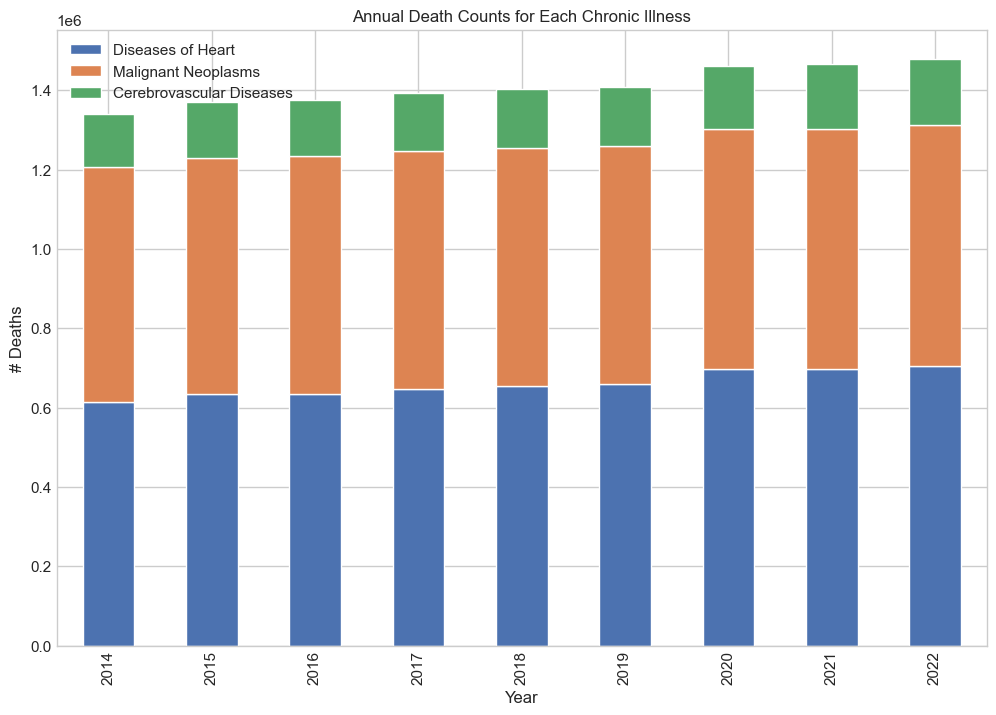

In [33]:
#Plot a stacked bar chart to provide an alternative method for displaying how the distribution of illnesses changes over time 

deaths_per_year.plot.bar(y = target_illnesses, stacked = True, figsize = (12,8))
plt.title("Annual Death Counts for Each Chronic Illness")
plt.ylabel("# Deaths")

plt.show()

3a. Summary:

Based on the above analysis, we should focus our efforts on these top three chronic illnesses:

1. Diseases of Heart: From the selected chronic illnesses, this illness is the largest cause of death, as of 2022, and the share of deaths caused by this illness has been increasing over recent years.
2. Malignant Neoplasms: Although the share of deaths caused by this illness has been decreasing over recent years, from the selected chronic illnesses, it is still the second largest cause of death, as of 2022.
3. Cerebrovascular Diseases: As of 2022, this illness is the third largest cause of death, and the share of deaths caused by this illness has been increasing over recent years.


## 3b. Analysis: Should we adjust our marketing plan to account for seasonality?

In [18]:
# Aggregating deaths per month
deaths_per_month = data.groupby(['Year', 'Month'])[chronic_illnesses].sum()

# Create total column
total_deaths_per_month = deaths_per_month.sum(axis = 1) 
deaths_per_month["Total"] = total_deaths_per_month

deaths_per_month.head(9)

Diseases of Heart  Malignant Neoplasms  Septicemia  \
Year Month                                                       
2014 1                  58229                51101        3944   
     2                  50435                45558        3214   
     3                  54347                50646        3451   
     4                  50954                48304        3125   
     5                  50810                49497        3105   
     6                  47144                48103        2947   
     7                  47991                49259        3112   
     8                  47109                49519        2931   
     9                  46909                48331        2918   

            Diabetes Mellitus  Alzheimer Disease  \
Year Month                                         
2014 1                   7344               8305   
     2                   6443               7315   
     3                   6738               7999   
     4                   6343               7117   
     5                   6272               7266   
     6                   5802               6755   
     7                   5983               6990   
     8                   5930               6986   
     9                   5810               7238   

            Chronic Lower Respiratory Diseases  \
Year Month                                       
2014 1                                   15078   
     2                                   12747   
     3                                   13493   
     4                                   12573   
     5                                   12281   
     6                                   11207   
     7                                   11161   
     8                                   10722   
     9                                   10426   

            Nephritis, Nephrotic Syndrome, and Nephrosis  \
Year Month                                                 
2014 1                                              4600   
     2                                              4064   
     3                                              4300   
     4                                              3902   
     5                                              3980   
     6                                              3631   
     7                                              3690   
     8                                              3778   
     9                                              3823   

            Cerebrovascular Diseases   Total  
Year Month                                    
2014 1                         12074  160675  
     2                         10780  140556  
     3                         11395  152369  
     4                         10773  143091  
     5                         10963  144174  
     6                          9973  135562  
     7                         10449  138635  
     8                         10369  137344  
     9                         10513  135968

In [19]:
# Create a reference to relevant list of illnesses 
target_illnesses = ["Diseases of Heart", "Malignant Neoplasms","Cerebrovascular Diseases"]

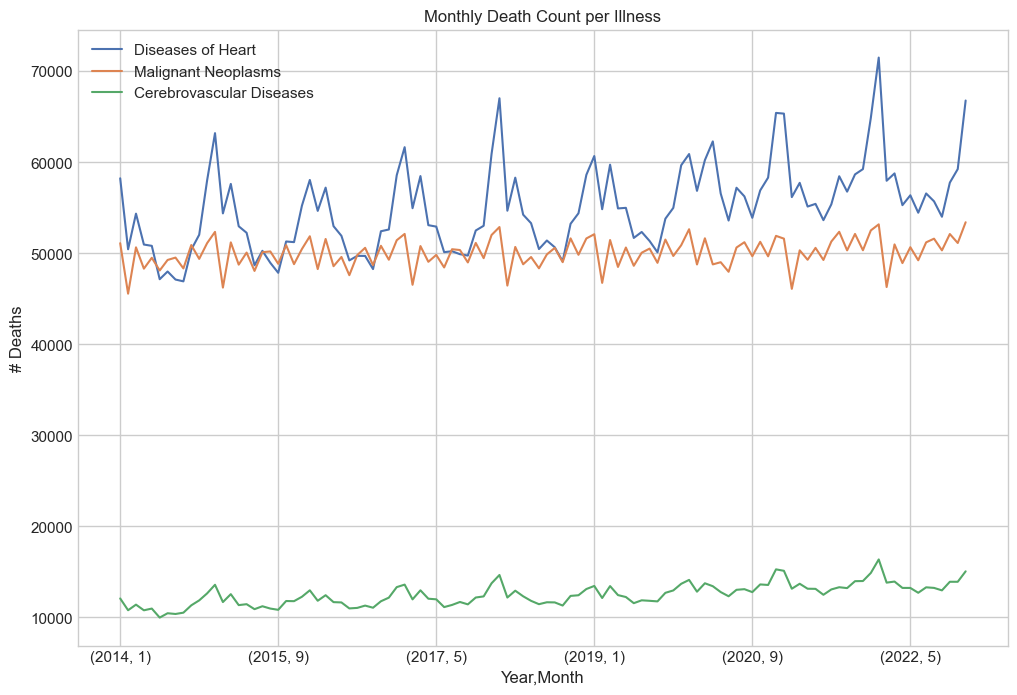

In [20]:
# Plot monthly death counts for selected chronic illnesses (absolute)

deaths_per_month.plot(y = target_illnesses, figsize = (12,8))
plt.title("Monthly Death Count per Illness")
plt.ylabel("# Deaths")

plt.show()

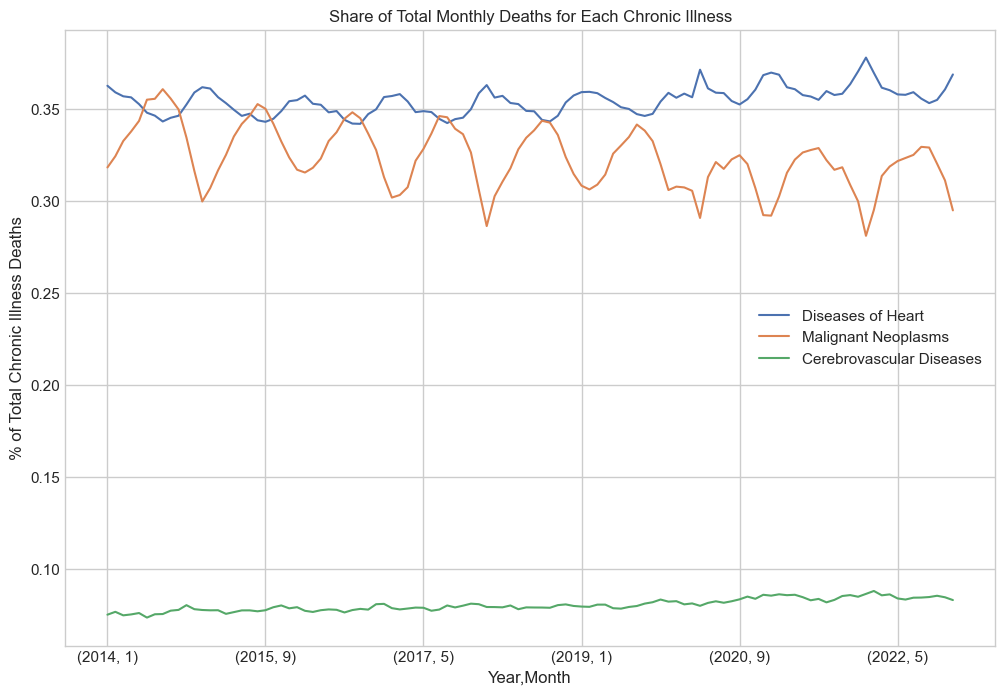

In [21]:
# Plot the monthly death counts for selected chronic illnesses (ratio of all selected chronic illnesses)share_in_natdeaths = data.divide(data["Total"], axis = 0)

share_in_deaths_m = deaths_per_month.divide(deaths_per_month["Total"], axis = 0)
share_in_deaths_m.plot(y = target_illnesses, figsize = (12,8)); 
plt.title("Share of Total Monthly Deaths for Each Chronic Illness")
plt.ylabel("% of Total Chronic Illness Deaths")

plt.show()

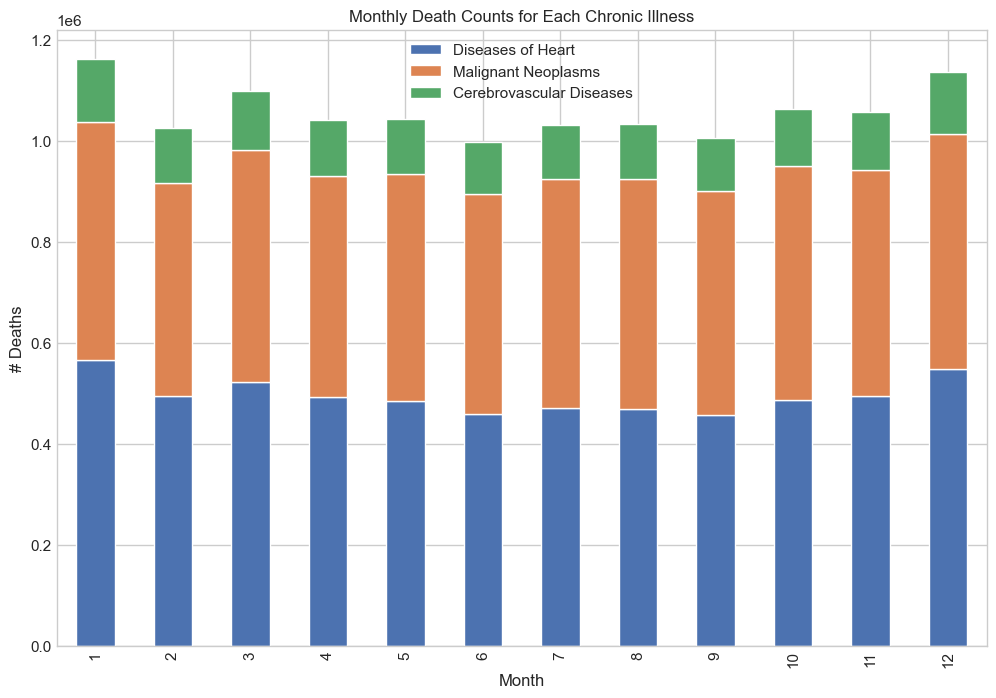

In [22]:
# #Stacked bar charts to observe how the monthly distribution of illnesses changes

total_deaths_per_month = data.groupby('Month')[target_illnesses].sum()
total_deaths_per_month.plot.bar(stacked = True, figsize = (12,8))

plt.title("Monthly Death Counts for Each Chronic Illness")
plt.ylabel("# Deaths")

plt.show()


Standardizing Average Monthly Death Counts

In [23]:
# Setting up analysis of annual averages and standardization
newdata = data.copy()
newdata.drop(columns = ["Septicemia", "Diabetes Mellitus", "Alzheimer Disease", "Chronic Lower Respiratory Diseases","Nephritis, Nephrotic Syndrome, and Nephrosis", "COVID-19 (Multiple Cause of Death)", "COVID-19 (Underlying Cause of Death)", "Total", "Total w/o Covid"], inplace = True)
newdata["Year"] = newdata["Year"].astype(int)
newdata["Month"] = newdata["Month"].astype(int)
year_avg = newdata.groupby(["Year"]).mean()
year_avg.drop(columns = "Month", inplace = True)

year_stddev = newdata.groupby(["Year"]).std()
year_stddev.drop(columns = "Month", inplace = True)
year_stddev
year_avg # we should look at how annual averages change



,Malignant Neoplasms,Diseases of Heart,Cerebrovascular Diseases
Year,,,
2014,49308.333333,51195.666667,11091.916667
2015,49660.833333,52820.166667,11693.583333
2016,49836.500000,52938.333333,11845.166667
2017,49925.666667,53954.750000,12198.583333
2018,49939.500000,54615.083333,12317.500000
2019,49966.750000,54920.083333,12500.416667
2020,50259.333333,58196.583333,13376.333333
2021,50502.500000,58064.416667,13592.916667
2022,50747.333333,58696.750000,13802.083333


In [24]:
averages = newdata.copy()
column_count = year_avg.shape[1]
year_count = year_avg.shape[0]

k = 0
while k < column_count:
    y = 2014
    name = year_avg.columns.values[k]
    while y < 2023:
        mu = year_avg.loc[y, name]
        #ratios[name] = np.where(ratios["Year"] == y, mu) Does exactly teh same as the below line - I could not decide
        averages.loc[ averages["Year"] == y, name ] = mu.astype(int)  #I am for now filling the ratios df with teh corresponding year averages so I can apply elementwise division later
        y = y+1
    k = k+1
averages

,Year,Month,Malignant Neoplasms,Diseases of Heart,Cerebrovascular Diseases
0,2014,1,49308,51195,11091
1,2015,1,49660,52820,11693
2,2016,1,49836,52938,11845
3,2017,1,49925,53954,12198
4,2018,1,49939,54615,12317
...,...,...,...,...,...
103,2022,8,50747,58696,13802
104,2022,9,50747,58696,13802
105,2022,10,50747,58696,13802
106,2022,11,50747,58696,13802


In [25]:
deviations = newdata.copy(deep = True)
column_count = year_stddev.shape[1]
year_count = year_stddev.shape[0]

k = 0
while k < column_count:
    y = 2014
    name = year_stddev.columns.values[k]
    while y < (2020):
        sdev = year_stddev.loc[y, name]
        deviations.loc[ deviations["Year"] == y, name ] = sdev.astype(int) 
        y = y+1
    k = k+1
deviations

,Year,Month,Malignant Neoplasms,Diseases of Heart,Cerebrovascular Diseases
0,2014,1,1604,3924,786
1,2015,1,1623,4342,794
2,2016,1,1413,3531,756
3,2017,1,1577,4228,839
4,2018,1,1715,4871,926
...,...,...,...,...,...
103,2022,8,51598,55701,13234
104,2022,9,50314,54006,12963
105,2022,10,52108,57755,13907
106,2022,11,51123,59244,13906


In [26]:
standard_spread = (newdata.sub(averages)).div(deviations)
standard_spread

,Year,Month,Malignant Neoplasms,Diseases of Heart,Cerebrovascular Diseases
0,0.0,0.0,1.117830,1.792559,1.250636
1,0.0,0.0,1.654960,2.388300,2.371537
2,0.0,0.0,1.434536,1.447465,1.485450
3,0.0,0.0,1.391883,1.820246,1.665077
4,0.0,0.0,1.712536,2.547526,2.522678
...,...,...,...,...,...
103,0.0,0.0,0.016493,-0.053769,-0.042920
104,0.0,0.0,-0.008606,-0.086842,-0.064723
105,0.0,0.0,0.026119,-0.016293,0.007550
106,0.0,0.0,0.007355,0.009250,0.007479


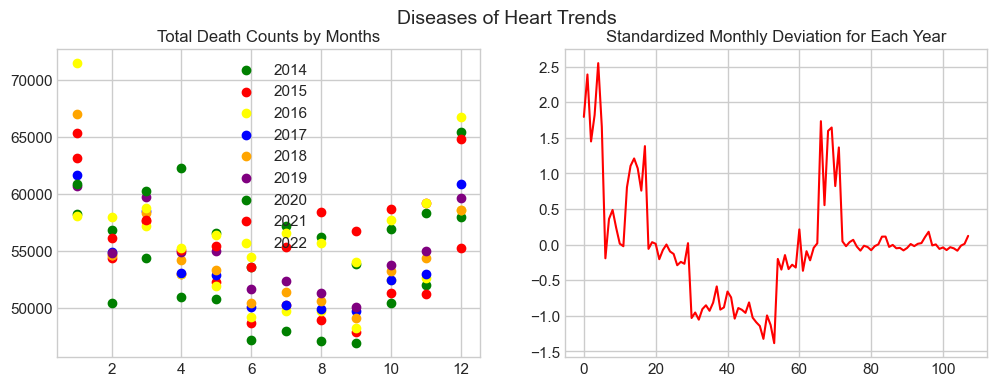

In [27]:
fig1 = plt.figure(figsize = (12,4))
fig1.suptitle("Diseases of Heart Trends", fontsize=14)

fig1_ax1 = fig1.add_subplot(1,2,1)
fig1_ax2 = fig1.add_subplot(1,2,2)


#Graph 1

colors = {2014: "green", 2015: "red", 2016: "yellow", 2017: "blue", 2018: "orange", 2019: "purple", 2020: "green", 2021: "red", 2022: "yellow"}
for i in colors:
    fig1_ax1.scatter(y = data.loc[data["Year"]== i,"Diseases of Heart"], x = data.loc[data["Year"]== i,"Month"], c = colors[i], label = i) 
fig1_ax1.legend(loc = "best")
fig1_ax1.set_title("Total Death Counts by Months")

#Graph 2

fig1_ax2.plot(standard_spread["Diseases of Heart"], c = "red") 
fig1_ax2.set_title("Standardized Monthly Deviation for Each Year");

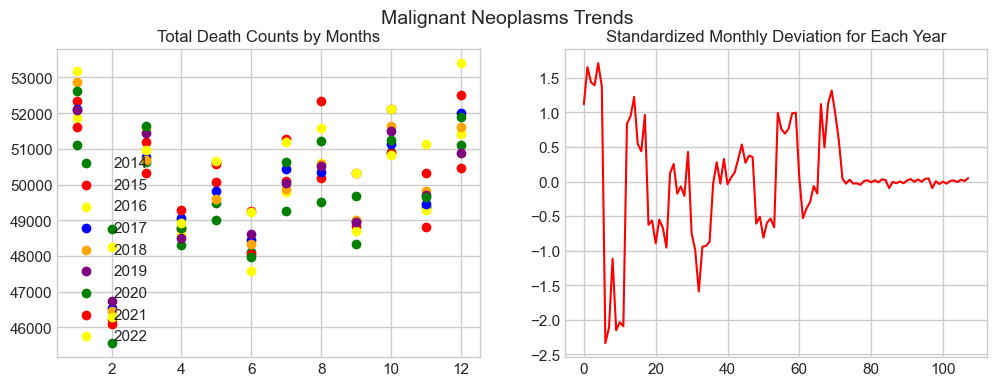

In [28]:
fig2 = plt.figure(figsize = (12,4))
fig2.suptitle("Malignant Neoplasms Trends", fontsize=14)

fig2_ax1 = fig2.add_subplot(1,2,1)
fig2_ax2 = fig2.add_subplot(1,2,2)


#Graph 1

colors = {2014: "green", 2015: "red", 2016: "yellow", 2017: "blue", 2018: "orange", 2019: "purple", 2020: "green", 2021: "red", 2022: "yellow"}
for i in colors:
    fig2_ax1.scatter(y = data.loc[data["Year"]== i,"Malignant Neoplasms"], x = data.loc[data["Year"]== i,"Month"], c = colors[i], label = i) 
fig2_ax1.legend(loc = "best")
fig2_ax1.set_title("Total Death Counts by Months")

#Graph 2

fig2_ax2.plot(standard_spread["Malignant Neoplasms"], c = "red") 
fig2_ax2.set_title("Standardized Monthly Deviation for Each Year");

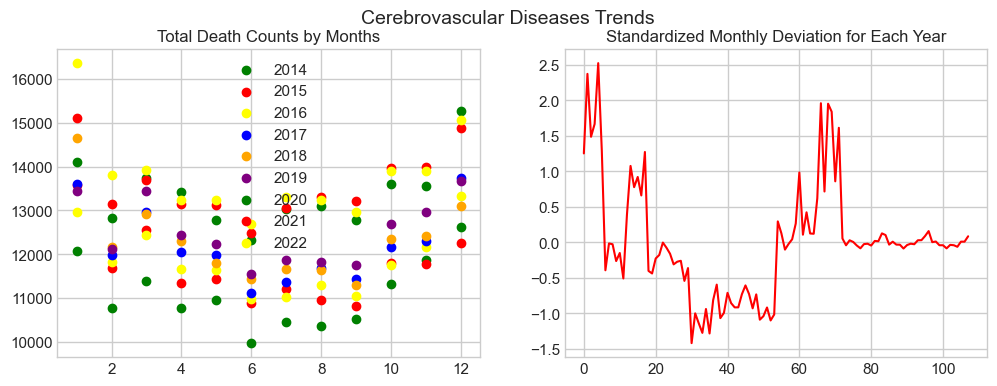

In [29]:
fig3 = plt.figure(figsize = (12,4))
fig3.suptitle("Cerebrovascular Diseases Trends", fontsize=14)

fig3_ax1 = fig3.add_subplot(1,2,1)
fig3_ax2 = fig3.add_subplot(1,2,2)


#Graph 1

colors = {2014: "green", 2015: "red", 2016: "yellow", 2017: "blue", 2018: "orange", 2019: "purple", 2020: "green", 2021: "red", 2022: "yellow"}
for i in colors:
    fig3_ax1.scatter(y = data.loc[data["Year"]== i,"Cerebrovascular Diseases"], x = data.loc[data["Year"]== i,"Month"], c = colors[i], label = i) 
fig3_ax1.legend(loc = "best")
fig3_ax1.set_title("Total Death Counts by Months")

#Graph 2

fig3_ax2.plot(standard_spread["Cerebrovascular Diseases"], c = "red") 
fig3_ax2.set_title("Standardized Monthly Deviation for Each Year");

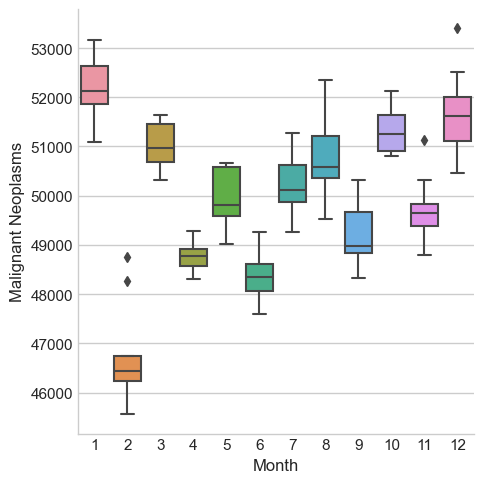

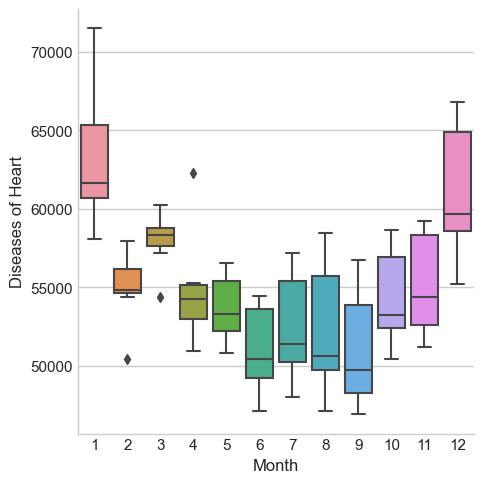

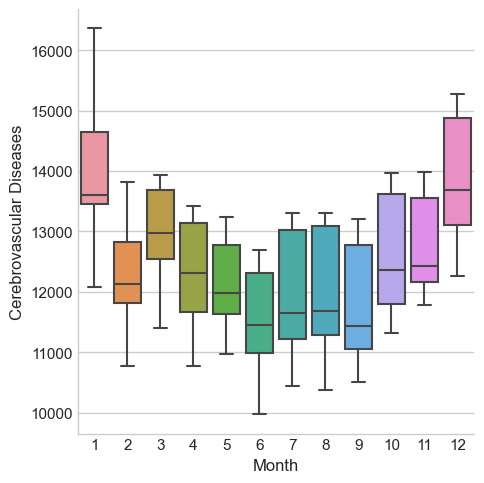

In [30]:
# #Display boxplot for a selected disease to observe potential seasonality trends

# column_count1 = newdata.shape[1]
# i = 2 
# # i is our starting column, as we will not plot the months and years
# while i < column_count1: 
#     name1 = newdata.columns.values[i]
#     sns.catplot(y= name1, x="Month", kind="box", data=data)
#     #plt.savefig(name1, format="pdf" )
#     i=i+1

3b. Summary:

...


## 3c. Analysis: Since the onset of Covid-19, have there been any significant shifts in death trends regarding the top three chronic illness?